# Floating point number representation
A computer cannot store numbers real exactly, and needs a way to encode them. 
A floating point number is represented as $$ x \approx \pm m b^e, $$ where $m$ is the *mantissa* or *significant*, $b$ the *basis* or *radix* and $e$ the *exponent*.
A normalized system sets $1 \leq m < b$. For example, the number $395.2134$ writes $+ 3.952134 \times 10^2$ in floating point arithmetic ($b=10$).
Every computer system uses such a representation for numbers, but usually works in base 2 instead of the base 10 that we use everyday.  

# Python representation
Let us check how Python represents a real number

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Python uses what is called the **double** precision format (64 bits). We can read $b=2$ (radix), $N=53$ bits for the mantissa (15 decimal digits), which includes one implicit bit for the sign $\pm$. This means $64-53=11$ bits for the exponent. It allows to covers the "underflow-overflow" range $[\text{min}_{10}, \text{max}_{10}] =[2^{-1022}, 2^{1023}(2-2^{-52})]$ with 11 bits.  
Because $2^{11}=2048$, the exponent is stored in the range $1 \dots 2046$ (0 and 2047 have special meanings) and is interpreted in a bias form to get an exponent value in the range $−1022 \dots +1023$. The machine epsilon is $2^{1-N} = 2^{-53}$, which is the relative error bound.

# Absolute and relative spacing
We can check what is the relative and absolute spacing between two floating point numbers

In [2]:
import numpy as np # import the numpy library

# distance between x and the nearest adjacent number
print(np.spacing(1e12)) # absolute spacing
print( (np.spacing(1e12)) / 1e12 ) # relative spacing
# print("{:e}".format(16**256)) # overflow

print(np.spacing(1e1)) # absolute spacing
print( (np.spacing(1e1)) / 1e1 ) # relative spacing

0.0001220703125
1.220703125e-16
1.7763568394002505e-15
1.7763568394002506e-16


In [3]:
# what are the outputs of these lines ?
print ( 1e9 == (1e9 + np.spacing(1e9)/3) )
print ( 1e9 == (1e9 + 1.01*np.spacing(1e9)) )

True
False


# Additioning floating point numbers
Be careful: the addition is not commutative in floating-point arithmetic !

In [4]:
# Error in addition: (a+b) + c != a + (b+c) in floating point arithmetic
a = 2.3371258 * 10**(-5)
b = 3.3678429 * 10**1
c = -3.3677811 * 10**1

# amplification factors
ampli1 = (a+b) / (a+b+c)
ampli2 = (b+c) / (a+b+c)

print("{:.2f}".format(ampli1))
print("{:.2f}".format(ampli2))

t1 = round(a+b, 5) + c
t2 = a + round(b + c, 5)
print(f'(a+b) + c :{t1:.20f}')
print(f'a + (b+c) :{t2:.20f}')

52510.07
0.96
(a+b) + c :0.00063899999999250667
a + (b+c) :0.00064337125799999995


# Cancellation effect
Loss of significant digits

In [5]:
def computeRatio(n):
    """ Compute the number q = (pi - 3.1415) / (10^4*(pi - 3.1415) - 0.927)
    using n number of significant digits to represent pi
    """
    pi_diff = round(np.pi, n-1) - 3.1415
    # print(pi_diff) # how many significant digit do we loose here ?
    return pi_diff / (10**4*pi_diff - 0.927)

print("use 8 significant digits, q = ", computeRatio(9), "the result is accurate up to 1 significant digit") # single precision
print("use 12 significant digits, q = ", computeRatio(13), "the result is accurate up to 5 significant digit") 
print("use 16 significant digits, q = ", computeRatio(17), "the result is accurate up to 9 significant digit") # double precision
# conclusion: if pi has n significant digits, q has n-8 significant digits !

use 8 significant digits, q =  -0.18530000010170308 the result is accurate up to 1 significant digit
use 12 significant digits, q =  -0.19964143452071273 the result is accurate up to 5 significant digit
use 16 significant digits, q =  -0.1996405438630753 the result is accurate up to 9 significant digit


# Conditioning
Good conditioning: small variations of data $\rightarrow$ small variations on the result.  
For a function $f \in C^1$ the conditioning is $$ \text{cond}(f)_x = \left| \frac{x f'(x)}{f(x)} \right| $$
For $f(x) = a - x$, the conditioning is large if $x$ is close to $a$. 

Text(0.5, 1.0, 'Conditioning of $f(x)=(a-x)$ for $a = 1.0$')

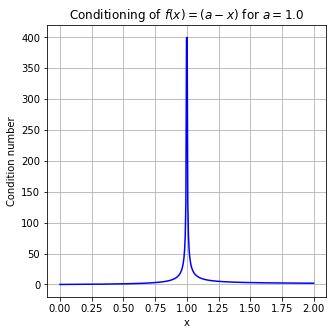

In [6]:
import matplotlib.pyplot as plt

a = 1.
x = np.linspace(a-1, a+1, 400)
# print(x)
cond_f = np.abs(-x/(a-x))
plt.figure(figsize=(5, 5))
plt.plot(x,cond_f, "b-")
plt.xlabel("x")
plt.ylabel("Condition number")
plt.grid()
plt.title("Conditioning of $f(x)=(a-x)$ for $a = %s$" %round(a,3))

In [7]:
# another example: compute the number "f(x) = sqrt(x+1) - sqrt(x)"
x = 12345
print(np.round(np.sqrt(x+1),3))
res = np.round(np.sqrt(x+1),3)-np.round(np.sqrt(x),3) # use 6 significant digits
res2 = 1./(np.round(np.sqrt(x+1),3)+np.round(np.sqrt(x),3)) # alternative formula: why is it more accurate ?
# Hint: compare the conditioning of f with the conditioning of the individual operations (break down the conditioning of the algorithm) 
print("{:.6f}".format(res))
print("{:.6f}".format(res2))

111.113
0.005000
0.004500
